<h1>Clustering Algorithms</h1>
<h3>Unsupervised learning</h3>
<ul>
<li>The algorithm tries to group similar data together (clusters)
<li>Using the values of the feature space
</ul>
<h3>K-Means Clusterng</h3>
<ul>
<li>partitions the dataspace into clusters
<li>minimizes distance between the mean of a cluster and the data points
<li>the desired number of clusters must be known in advance
</ul>

<h2>Image recognition dataset</h2>
<ul>
<li>Digits 0-9 pixelated into 64 quadrants
<li>Each value represents the area that is shaded


<h2>Do imports</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

<h2>Load data</h2>

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [3]:
print(digits['DESCR'])


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<h2>scale the data to normal distribution</h2>

In [7]:
data = scale(digits.data)

In [8]:
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

<h2>Render the digit images and their associated values</h2>

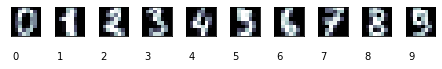

In [10]:
def print_digits(images,y,max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
           hspace=.05, wspace=.5)
    i = 0
    while i <max_n and i <images.shape[0]:
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[],
              yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1
print_digits(digits.images, digits.target, max_n=10)

<h2>Training and testing samples</h2>

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train,images_test = train_test_split(
        data, digits.target, digits.images,  test_size=0.25, 
          random_state=42)

n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

In [12]:
len(np.unique(y_train))

10

<h2>Create the model and fit the data</h2>

In [13]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++',n_clusters=10, random_state=42)
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

k-means++ runs an initializer before using the k-means algorithm

In [14]:
images_train

array([[[ 0.,  0.,  2., ..., 16., 11.,  0.],
        [ 0.,  0.,  8., ...,  3.,  0.,  0.],
        [ 0.,  0., 13., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  6., 16., ..., 16.,  5.,  0.],
        [ 0.,  0.,  3., ...,  8.,  0.,  0.],
        [ 0.,  0.,  4., ...,  0.,  0.,  0.]],

       [[ 0.,  5., 16., ...,  0.,  0.,  0.],
        [ 0., 11., 14., ...,  0.,  0.,  0.],
        [ 0.,  8., 11., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  5.,  1.,  0.],
        [ 0.,  1., 11., ..., 16., 10.,  0.],
        [ 0.,  5., 16., ...,  6.,  1.,  0.]],

       [[ 0.,  0.,  4., ...,  0.,  0.,  0.],
        [ 0.,  0., 13., ...,  7.,  0.,  0.],
        [ 0.,  3., 16., ..., 15.,  6.,  0.],
        ...,
        [ 0.,  4., 12., ..., 11.,  6.,  0.],
        [ 0.,  0., 14., ..., 14.,  1.,  0.],
        [ 0.,  0.,  7., ...,  2.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  9., ..., 13.,  1.,  0.],
        [ 0.,  0., 12., ..., 16.,  7.,  0.],
        [ 0.,  0.,  0., ..., 16.,  4.,  0.

<h2>Call print_digits with training images, and computed labels</h2>
<h2>Returned labels are cluster numbers</h2>

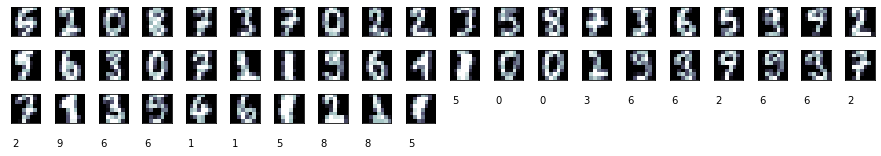

In [16]:
print_digits(images_train, clf.labels_, max_n=20)

<h2>Use test sample to generate predictions</h2>

In [17]:
y_pred=clf.predict(X_test)
y_pred

array([1, 6, 6, 7, 3, 8, 3, 6, 3, 3, 5, 9, 1, 0, 1, 3, 6, 2, 6, 3, 9, 3,
       6, 2, 5, 1, 6, 3, 1, 6, 1, 6, 8, 1, 1, 1, 6, 1, 2, 1, 1, 6, 5, 6,
       1, 9, 6, 0, 1, 6, 2, 5, 6, 3, 1, 0, 6, 0, 0, 9, 0, 9, 6, 3, 9, 6,
       2, 0, 2, 6, 6, 6, 6, 2, 2, 0, 9, 3, 6, 6, 6, 0, 3, 6, 6, 0, 1, 1,
       1, 6, 5, 8, 5, 6, 6, 8, 6, 0, 1, 1, 9, 6, 6, 6, 9, 2, 2, 9, 9, 8,
       2, 2, 1, 1, 9, 6, 5, 2, 6, 2, 3, 1, 6, 9, 0, 2, 3, 2, 3, 5, 3, 6,
       2, 2, 0, 1, 1, 1, 8, 5, 0, 6, 9, 1, 6, 9, 1, 6, 0, 6, 6, 1, 1, 0,
       1, 1, 8, 6, 6, 2, 2, 3, 6, 0, 9, 5, 5, 1, 2, 2, 6, 3, 1, 5, 5, 3,
       2, 2, 3, 3, 6, 6, 6, 0, 6, 5, 8, 3, 1, 6, 6, 1, 5, 3, 7, 3, 6, 1,
       2, 5, 6, 6, 6, 2, 5, 6, 1, 5, 5, 3, 9, 1, 6, 1, 5, 6, 1, 0, 9, 3,
       3, 2, 9, 1, 9, 3, 1, 0, 6, 3, 6, 1, 2, 9, 6, 8, 9, 2, 1, 5, 5, 6,
       3, 5, 0, 8, 5, 5, 2, 2, 2, 1, 3, 3, 8, 6, 1, 5, 5, 6, 1, 0, 6, 3,
       2, 0, 5, 0, 1, 6, 5, 3, 6, 1, 0, 9, 8, 0, 0, 6, 1, 6, 6, 2, 6, 2,
       6, 6, 6, 5, 3, 6, 6, 9, 0, 2, 5, 6, 9, 0, 8,

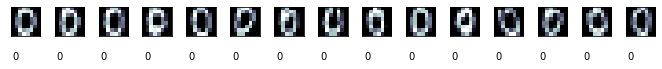

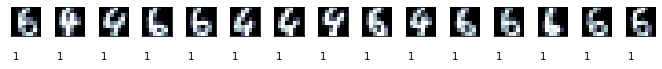

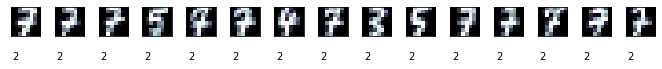

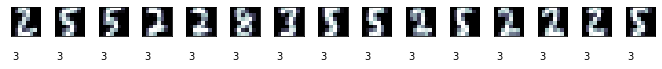

<Figure size 864x864 with 0 Axes>

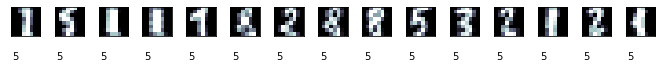

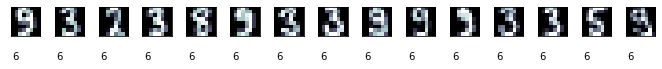

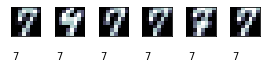

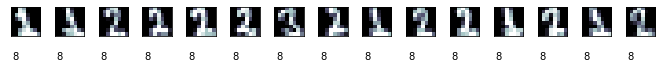

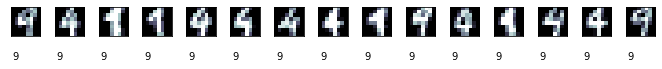

In [18]:
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred,max_n=15)
for i in range(10):
      print_cluster(images_test, y_pred, i)


<h1>Evaluating the model</h1>
<li>Adjusted rand index: A measure of the similarity between two groups</li>
<li>We'll use it to see how similar the y_test actuals and predicted groupings are</li>
<li>http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html</li>
<li>0.0 indicates that there is no similarity and any overlap is explainable as totally random</li>
<li>1.0 indicates that the two groups are identical</li>


In [19]:
from sklearn import metrics
print("Adjusted rand score: {0:2}".format(metrics.adjusted_rand_score(y_test, y_pred)))

Adjusted rand score: 0.4014715365247134


<h2>Confusion matrix</h2>
<li>Each row corresponds to a number (y_test)
<li>Each column to y_pred (the cluster number)
<li>Data is the number of times y_test was assigned to the corresponding y_pred
<li>For example, 0 is fully assigned to cluster 2 (Row 0, Column 2)
<li>8 is assigned to cluster 0  21 times (Row 8, Column 0)
<li>7, which is cluster 6 is assigned to cluster 6 34 times (Row 7, Column 6)


In [22]:
print(metrics.confusion_matrix(y_test, y_pred))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  7 10]
 [ 0  0  0 21  0  6  1  0  9  1]
 [ 0  0  4  2  0  1 38  0  1  0]
 [ 0 24  4  0  0  1  0  1  0 25]
 [ 0  2  6 22  0  4 25  0  0  0]
 [ 1 44  0  0  0  0  0  0  0  0]
 [ 0  0 34  2  0  0  0  5  0  0]
 [ 0  0  1  3  0 24 10  0  0  0]
 [ 0  0  4  0  0  0 41  0  0  3]]


<h2>Graphical view of the clusters</h2>

<li>First reduce the x dimensions to 2 using principle component analysis</li>
<li>https://en.wikipedia.org/wiki/Principal_component_analysis</li>
<li>Then figure out the range of values and define the grid</li>
<li>Run k-means on the reduced (2 component) data set</li>
<li>Draw a color map and plot the pca points on this map</li>
<li>Find the cluster centroids and plot them on the color map</li>



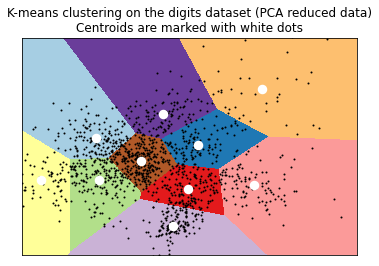

In [21]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)
# Step size of the mesh. 
h = .01     
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
    np.arange(y_min, y_max, h))
kmeans = cluster.KMeans(init='k-means++', n_clusters=n_digits, 
    n_init=10)
kmeans.fit(reduced_X_train)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', 
    markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],marker='.', 
    s=169, linewidths=3, color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA reduced data)\nCentroids are marked with white dots')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# K-Means Clustering of Volunteer Profiles

In [242]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [223]:
vol = pd.read_csv('VolunteersOverview.csv')

In [224]:
vol.drop(['School','Age','Province'], axis=1, inplace=True)

In [225]:
vol.dropna(inplace=True)

In [226]:
vol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 807
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     734 non-null    float64
 1   Distance                   734 non-null    float64
 2   Tenure                     734 non-null    int64  
 3   Employment Status          734 non-null    object 
 4   Student                    734 non-null    int64  
 5   Q - Other Languages        734 non-null    object 
 6   Hours Volunteered in 2015  734 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 45.9+ KB


In [227]:
vol.columns

Index(['Gender', 'Distance', 'Tenure', 'Employment Status', 'Student',
       'Q - Other Languages ', 'Hours Volunteered in 2015'],
      dtype='object')

In [228]:
# Change Everything that's not English Only to 'Other'
vol.loc[vol['Q - Other Languages '] != "English Only", 'Q - Other Languages '] = "Other"

In [229]:
# Create dummy variables for 2 columns
dfEmployStatus = pd.get_dummies(vol['Employment Status'])
dfOtherLang = pd.get_dummies(vol['Q - Other Languages '])

#Concat new columns to original dataframe 
vol = pd.concat([vol, dfEmployStatus, dfOtherLang], axis=1)

In [230]:
# Drop one of the dummy columns and the original columns:
vol.drop(['Employment Status','Q - Other Languages ','Unemployed','Other'], axis=1, inplace=True)

In [231]:
vol.head()

,Gender,Distance,Tenure,Student,Hours Volunteered in 2015,Employed,Retired,Student,English Only
0,0.0,16.490,5,1,0.0,0,0,1,0
1,0.0,6.660,1,0,0.0,0,1,0,1
4,0.0,3.930,13,0,136.0,0,1,0,0
8,0.0,0.000,1,0,2.0,0,1,0,1
14,0.0,1.856,1,0,0.0,1,0,0,1


In [244]:
#standardize the data to normal distribution
scaler = MinMaxScaler()
vol_scaled = pd.DataFrame(scaler.fit_transform(vol), columns=vol.columns)

In [248]:
vol_scaled

,Gender,Distance,Tenure,Student,Hours Volunteered in 2015,Employed,Retired,Student,English Only
0,0.0,0.017776,0.125,1.0,0.000000,0.0,0.0,1.0,0.0
1,0.0,0.007179,0.000,0.0,0.000000,0.0,1.0,0.0,1.0
2,0.0,0.004237,0.375,0.0,0.361222,0.0,1.0,0.0,0.0
3,0.0,0.000000,0.000,0.0,0.005312,0.0,1.0,0.0,1.0
4,0.0,0.002001,0.000,0.0,0.000000,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
729,0.0,0.018940,0.000,0.0,0.011952,1.0,0.0,0.0,1.0
730,0.0,0.018940,0.000,1.0,0.000000,0.0,0.0,1.0,1.0
731,0.0,0.018940,0.000,1.0,0.000000,0.0,0.0,1.0,1.0
732,0.0,0.018940,0.000,1.0,0.014608,0.0,0.0,1.0,1.0


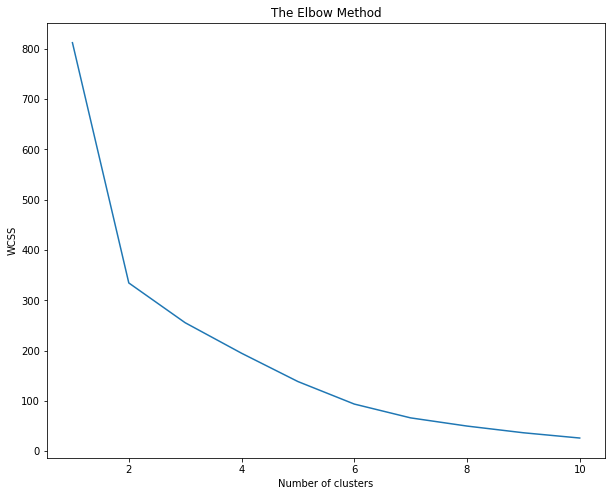

In [249]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(vol_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [266]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [261]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

TypeError: '(slice(None, None, None), 0)' is an invalid key

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


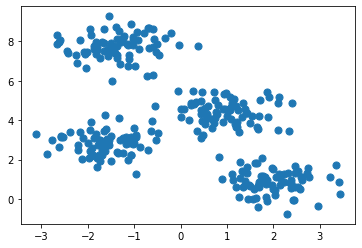

In [264]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [265]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

In [269]:


kmeans = KMeans(n_clusters=3).fit(vol_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(vol_scaled, c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[ 5.96590909e-02  1.66665125e-02  7.36860795e-03  1.00000000e+00
   2.32818725e-02  1.77635684e-15  4.16333634e-17  1.00000000e+00
   7.01704545e-01  2.29829545e+00]
 [ 1.00000000e+00  1.40568578e-02  8.72564935e-03  4.67532468e-01
   2.62672255e-02  4.54545455e-01  2.59740260e-02  4.67532468e-01
   8.96103896e-01  4.46753247e+00]
 [ 2.77555756e-16  1.11608517e-02  2.52192982e-02 -2.22044605e-15
   4.39732299e-02  7.93859649e-01  7.89473684e-02 -2.22044605e-15
   8.20175439e-01  1.00000000e+00]]


TypeError: scatter() missing 1 required positional argument: 'y'

## Volunteer Profile Clustering with k-means

In [319]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [344]:
df = pd.read_csv('VolunteersOverview.csv')

### Cleanup Data

In [345]:
df.drop(['School','Age','Province'], axis=1, inplace=True)

In [346]:
# Change Everything that's not English Only to 'Other'
df.loc[df['Q - Other Languages '] != "English Only", 'Q - Other Languages '] = "Other"

In [347]:
# Create dummy variables for 2 columns
dfEmployStatus = pd.get_dummies(df['Employment Status'])
dfOtherLang = pd.get_dummies(df['Q - Other Languages '])

#Concat new columns to original dataframe 
df = pd.concat([df, dfEmployStatus, dfOtherLang], axis=1)

In [348]:
# Drop one of the dummy columns and the original columns:
df.drop(['Employment Status','Q - Other Languages ','Unemployed','Other'], axis=1, inplace=True)

In [349]:
df.dropna(inplace=True)

In [351]:
df.to_csv('volunteerNew')

### Standardize

In [339]:
df_tr_std = stats.zscore(df[df.columns])


In [340]:
df_tr_std

array([[-0.56268019,  0.09454212,  1.3397743 , ...,  0.89152191,
         0.89152191, -1.8859709 ],
       [-0.56268019, -0.18744329, -0.24648512, ..., -1.12167742,
        -1.12167742,  0.53023088],
       [ 1.77720847, -0.37849343,  2.52946886, ..., -1.12167742,
        -1.12167742, -1.8859709 ],
       ...,
       [-0.56268019,  0.12552323, -0.24648512, ...,  0.89152191,
         0.89152191,  0.53023088],
       [-0.56268019,  0.12552323, -0.24648512, ...,  0.89152191,
         0.89152191,  0.53023088],
       [-0.56268019,  0.12552323, -0.24648512, ...,  0.89152191,
         0.89152191,  0.53023088]])

In [336]:
#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

In [338]:
df_tr_std

array([[-0.56268019,  0.09454212,  1.3397743 , ...,  0.89152191,
         0.89152191, -1.8859709 ],
       [-0.56268019, -0.18744329, -0.24648512, ..., -1.12167742,
        -1.12167742,  0.53023088],
       [ 1.77720847, -0.37849343,  2.52946886, ..., -1.12167742,
        -1.12167742, -1.8859709 ],
       ...,
       [-0.56268019,  0.12552323, -0.24648512, ...,  0.89152191,
         0.89152191,  0.53023088],
       [-0.56268019,  0.12552323, -0.24648512, ...,  0.89152191,
         0.89152191,  0.53023088],
       [-0.56268019,  0.12552323, -0.24648512, ...,  0.89152191,
         0.89152191,  0.53023088]])

In [332]:
#Glue back to originaal data
df_tr_std['clusters'] = labels

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [329]:
#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
print(df_tr_std[df_tr_std.columns].groupby(['clusters']).mean())

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### k-means cluster of volunteer profiles

In [428]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [429]:
df = pd.read_csv('volunteerNew')

In [430]:
# remove the first column
df = df.iloc[:,1:]

In [431]:
#Make a copy of DF
df_tr = df

In [432]:
# list of columns
clmns = ['Distance', 'Tenure', 'Student', 'Hours Volunteered in 2015',
       'Employed', 'Retired', 'Student.1', 'English Only']

### Standardize the data

In [433]:
df_tr_std = stats.zscore(df_tr[clmns])

### Cluster data

In [434]:
#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

In [435]:
#Glue back to original data
df_tr['clusters'] = labels

In [436]:
#Add the column into our list
clmns.extend(['clusters'])


### Analysis

In [437]:
#Lets analyze the clusters

In [438]:
# Let's look at the mean's of column by cluster
df_tr[clmns].groupby(['clusters']).mean()

,Distance,Tenure,Student,Hours Volunteered in 2015,Employed,Retired,Student.1,English Only
clusters,,,,,,,,
0,10.465270,2.115727,0.0,20.015579,0.744807,0.065282,0.0,0.816024
1,15.363302,1.228774,1.0,8.829009,0.000000,0.000000,1.0,0.752358


We can see that cluster 0 and 1 differ in that cluster 0 has a much higher <br>
hours volunteers, and are less likely to be a student, as well as greater tenure.

### Visualize clusters

It's tricky of course to visualize anything above 2 dimensions so I made a <br>
pair plot of a few of the features and colored the dots according to their cluster.<br>

In this way we can see some of the cluster differences.

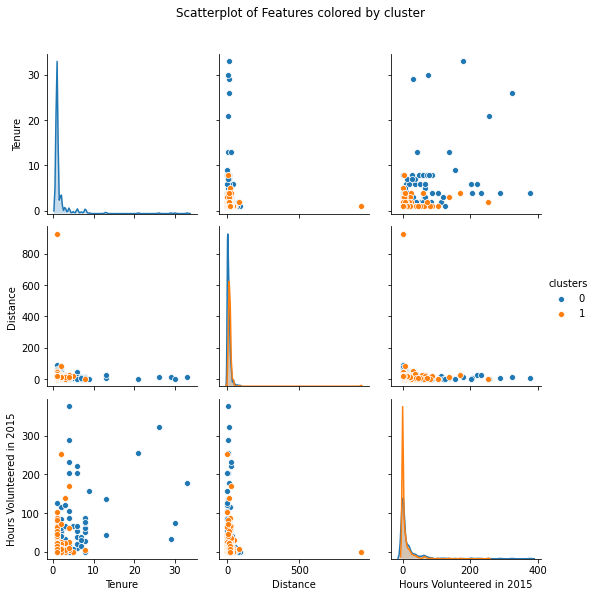

In [446]:
g = sns.pairplot(df_tr[['Tenure','Distance','Hours Volunteered in 2015','clusters']], hue="clusters");
warnings.filterwarnings(action = 'ignore', category=DeprecationWarning);

g.fig.suptitle("Scatterplot of Features colored by cluster", y=1.08);